<a href="https://colab.research.google.com/github/alejandramcr/challenge-data-science-robot-trading/blob/main/Desafio_1_RobotTrading_AluraV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Desafio 1:contruir un Robot Trading en Python capaz de tomar decisiones de compra y venta de Bitcoin en tiempo real**

Alejandra Cruz R. Bootcamp Alura Latam / marzo 2024

# **1. Configuración del ambiente**

In [19]:

!python -V
print('------')
!pip show Pandas | grep 'Name\|Version'
print('------')
!pip show Numpy | grep 'Name\|Version'
print('------')
!pip show Matplotlib | grep 'Name\|Version'

Python 3.10.12
------
Name: pandas
Version: 2.0.3
------
Name: numpy
Version: 1.25.2
------
Name: matplotlib
Version: 3.7.1


In [20]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
#Definir las variables globales
global df_bitcoin, precio_actual, tendencia, media_bitcoin,  algoritmo_decision

# importar biblioteca yfinance
import yfinance as yf

#importan las bibliotecas request y BeautifulSoup:
from bs4 import BeautifulSoup
import requests

#importar bibliotecas para automatización
from IPython.display import clear_output
import time


# **2. Obtención de datos**

**2.1 Precios historicos del bitcoin**

Crea una funcion importar_base_bitcoin(), dentro de ella, define nuevamente las variables globales y escribe tu código:

Utiliza la biblioteca yfinance de Python para extraer el histórico de precios del Bitcoin en dólares BTC-USD, deberás extraer el histórico de los últimos 7 días en intervalos de 5 minutos, este histórico deberás guardarlo en el dataframe df_bitcoin.

In [21]:
def importar_base_bitcoin():
    global df_bitcoin, precio_actual, tendencia, media_bitcoin, algoritmo_decision

    # Obtener los datos históricos de Bitcoin
    bitcoin = yf.Ticker("BTC-USD")
    df_bitcoin = bitcoin.history(period="7d", interval="5m")

    # Guardar los datos en un dataframe
    df_bitcoin = pd.DataFrame(df_bitcoin)

    return df_bitcoin


In [22]:
importar_base_bitcoin()
df_bitcoin.head(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2024-04-03 00:00:00+00:00,65465.406250,65572.828125,65465.406250,65501.359375,0,0.0,0.0
2024-04-03 00:05:00+00:00,65497.398438,65597.015625,65497.398438,65597.015625,22462464,0.0,0.0
2024-04-03 00:10:00+00:00,65601.234375,65612.031250,65501.535156,65507.707031,0,0.0,0.0
2024-04-03 00:15:00+00:00,65378.613281,65564.937500,65358.539062,65537.054688,13500416,0.0,0.0
2024-04-03 00:20:00+00:00,65516.089844,65516.089844,65271.281250,65271.281250,12460032,0.0,0.0
2024-04-03 00:25:00+00:00,65307.421875,65307.421875,65121.714844,65121.714844,38182912,0.0,0.0
2024-04-03 00:30:00+00:00,65123.898438,65147.433594,65000.378906,65000.378906,90431488,0.0,0.0
2024-04-03 00:35:00+00:00,64940.132812,64940.132812,64583.066406,64686.402344,179744768,0.0,0.0
2024-04-03 00:40:00+00:00,64809.460938,65226.316406,64809.460938,65226.316406,418725888,0.0,0.0


**2.2 Indicadores de Tendencia**

Crea una funcion extraer_tendencias(), dentro de ella, define nuevamente las variables globales y escribe tu código:

Utilizando la biblioteca BeautifulSoup deberás realizar Web Scraping de la página https://coinmarketcap.com/ para extraer el precio actual del Bitcoin BTC en dólares USD y la variación de su precio en la última hora 1h % . El precio deberás convertirlo a float y guardarlo en la variable llamada precio_actual. Ahora, en la variable tendencia guarda el valor de 'baja'si la variación del precio es negativa, sino, guarda el valor de 'alta'.

In [23]:
#Extraccion del precio actual del BTC de coinmarketCap

def extraer_tendencias():

    global precio_actual, tendencia

    url = 'https://coinmarketcap.com/'
    # referencia usada: https://www.zenrows.com/blog/user-agent-web-scraping#what-is
    headers = {'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko)Chrome/123.0.0.0 Safari/537.36'}
    response = requests.get(url, headers = headers)
    soup = (BeautifulSoup(response.content, 'html.parser')).tbody
    response = soup.findAll('p', {'class' : 'sc-4984dd93-0 iqdbQL coin-item-symbol'} )
    indice_fila = 0
    for row in response:
        if row.getText() == 'BTC':
            break
        else:
            indice_fila += 1

    lista = []
    response = soup.findAll('div',{'class':['sc-500f568e-0 ejtlWy','sc-500f568e-0 ejtlWy fall','sc-500f568e-0 ejtlWy rise']})
    precio_actual = float(soup.findAll('tr')[indice_fila].findAll('td')[3].getText().replace('$', '').replace(',', ''))

    response = soup.findAll('span',{'class':['sc-6a54057-0 YXxPZ','sc-6a54057-0 iEhQde']})
    for item in response[::3]:
      lista.append(item)

    tendencia = ''

    if soup.find_all('tr')[indice_fila].findAll('td')[4].span.span['class'][0] == 'icon-Caret-up':
        tendencia = 'Alta'
    else:
        tendencia = 'Baja'




In [24]:
#Muestra el precio actual del bitcoin y su tendencia
extraer_tendencias()
print('BitCoin Price: ', precio_actual)
print('Tendencia: ', tendencia)

BitCoin Price:  68657.91
Tendencia:  Baja


# **3. Limpieza de datos**


A continuación se realiza la limpieza de los datos

In [25]:
#  Muestra informacion de la base original, sin tratamiento
print(df_bitcoin.info())
df_bitcoin.describe().round(0)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1931 entries, 2024-04-03 00:00:00+00:00 to 2024-04-09 16:50:00+00:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1931 non-null   float64
 1   High          1931 non-null   float64
 2   Low           1931 non-null   float64
 3   Close         1931 non-null   float64
 4   Volume        1931 non-null   int64  
 5   Dividends     1931 non-null   float64
 6   Stock Splits  1931 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 120.7 KB
None


,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,1931.0,1931.0,1931.0,1931.0,1.931000e+03,1931.0,1931.0
mean,68432.0,68473.0,68390.0,68432.0,2.831152e+07,0.0,0.0
std,1886.0,1885.0,1884.0,1883.0,6.129912e+07,0.0,0.0
min,64809.0,64940.0,64583.0,64686.0,0.000000e+00,0.0,0.0
25%,66821.0,66873.0,66770.0,66829.0,0.000000e+00,0.0,0.0
50%,68062.0,68109.0,68027.0,68065.0,0.000000e+00,0.0,0.0
75%,69471.0,69505.0,69442.0,69475.0,3.118490e+07,0.0,0.0
max,72669.0,72676.0,72565.0,72571.0,1.054018e+09,0.0,0.0


<Axes: >

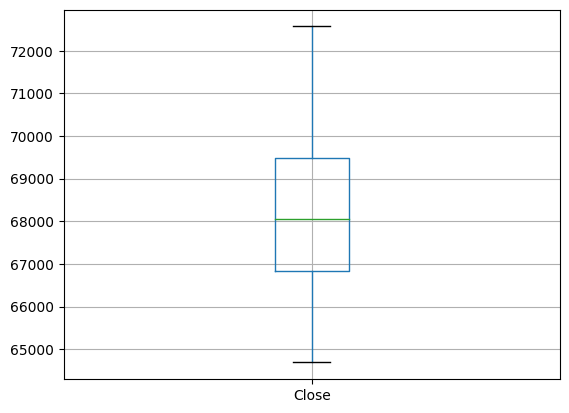

In [26]:
#Mostrar el boxplot de la base sin tratamiento
df_bitcoin.boxplot(['Close'])
#df_bitcoin.boxplot(column='Close', color='blue')



El **boxplot** devuelve los cuartiles. En el eje Y son los precios del bitcoin. La primera linea de la caja es el primer cuartil. La línea dentro de la caja es la mediana. El tercer cuartil, línea superior de la caja. Valor máximo, es la línea horizontal sobre la línea vertical que sale fuera de la caja  y el mínimo es la linea horizontal, debajo de la caja.

**Insights**: No se observan en la gráfica los outliers.

*Para el desafio, solo nos vamos a quedar con el intervalo que va desde el primer cuartil hasta el tercer cuartil*

Al trabajar con estos valores, **puedo estimar un precio mas cercano a la realidad durante los 7 dias.**

**3.1 Se crea una funcion limpieza_datos**

Dentro de ella, se definen nuevamente las variables globales.

Antes de limpiar la base, se crea una copia de la base df_bitcoin para rearealizar la limpieza en esta nueva base(df_bitcoin_limpio), sin modificar la base original:

In [27]:
def limpieza_datos():
    global df_bitcoin_limpio, media_bitcoin

    # Crear una copia del DataFrame original
    df_bitcoin_limpio = df_bitcoin.copy()

    # Eliminar filas duplicadas en el índice
    df_bitcoin_limpio = df_bitcoin_limpio.loc[~df_bitcoin_limpio.index.duplicated(keep='first')]

    # Tratar valores nulos en la columna Close
    df_bitcoin_limpio['Close'] = df_bitcoin_limpio['Close'].fillna(method='ffill')

    # Eliminar filas con Volumen igual a 0
    df_bitcoin_limpio = df_bitcoin_limpio[df_bitcoin_limpio['Volume'] > 0]

    # Identificar y eliminar outliers en la columna Close
    q1 = df_bitcoin_limpio['Close'].quantile(0.25)
    q3 = df_bitcoin_limpio['Close'].quantile(0.75)
    rango_intercuartil = q3 - q1
    limite_inferior = q1 - (1.5 * rango_intercuartil)
    limite_superior = q3 + (1.5 * rango_intercuartil)

    df_bitcoin_limpio = df_bitcoin_limpio[(df_bitcoin_limpio['Close'] >= limite_inferior) & (df_bitcoin_limpio['Close'] <= limite_superior)]

    #Seleccionar los valores entre q1 y q3
    filtro_q1_q3 = (df_bitcoin_limpio['Close'] >= q1) & (df_bitcoin_limpio['Close'] <= q3)
    df_bitcoin_limpio = df_bitcoin_limpio[filtro_q1_q3]

    #Reasignar el indice
    df_bitcoin_limpio.reset_index(inplace = True)

    # Calcular el precio promedio (Close) y guardarlo en media_bitcoin
    media_bitcoin = round(df_bitcoin_limpio['Close'].mean(), 2)

    #return df_bitcoin_limpio


In [28]:
#Mostrar el boxplot de la base limpia
limpieza_datos()
df_bitcoin_limpio.describe().round(0)



,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,447.0,447.0,447.0,447.0,447.0,447.0,447.0
mean,68971.0,69023.0,68923.0,68976.0,51764116.0,0.0,0.0
std,777.0,769.0,775.0,771.0,66218548.0,0.0,0.0
min,67470.0,67607.0,67470.0,67573.0,2048.0,0.0,0.0
25%,68283.0,68344.0,68217.0,68284.0,12601344.0,0.0,0.0
50%,69193.0,69225.0,69127.0,69191.0,28858368.0,0.0,0.0
75%,69452.0,69473.0,69412.0,69440.0,65075200.0,0.0,0.0
max,70922.0,70949.0,70834.0,70883.0,498006016.0,0.0,0.0


<Axes: >

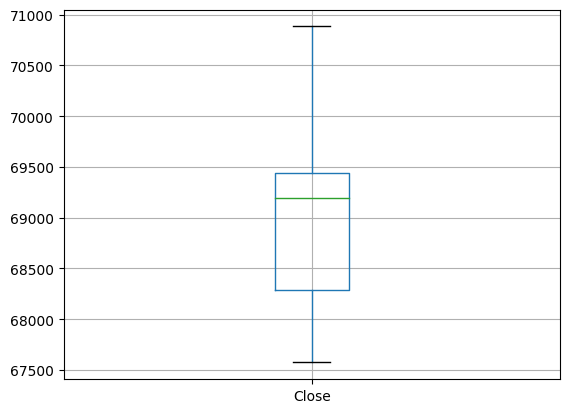

In [29]:
df_bitcoin_limpio.boxplot(['Close'])

**Observació**n: Se redujo la distancia entre el valor máximo y el valor mínimo

# **4. Tomar decisiones**

4.1 Se crea una funcion tomar_decisiones(), dentro de ella, se definen nuevamente las variables globales:

In [30]:
def tomar_decisiones():
    global decision,media_bitcoin, precio_actual

    # Criterio de decisión
    if precio_actual >= media_bitcoin and tendencia == 'baja':
        decision = 'Vender'
    elif precio_actual < media_bitcoin and tendencia == 'alta':
        decision = 'Comprar'
    else:
        decision = 'Esperar'


4.2 Mostrar los resultados con el ajuste realizado:

In [31]:
importar_base_bitcoin()
extraer_tendencias()
limpieza_datos()
tomar_decisiones()
print('Precio Promedio del Bitcoin: ', media_bitcoin)
print('Precio Actual del Bitcoin: ', precio_actual)
print('Tendencia: ', tendencia)
print('Decision del Algoritmo:', decision)

Precio Promedio del Bitcoin:  68976.17
Precio Actual del Bitcoin:  68657.91
Tendencia:  Baja
Decision del Algoritmo: Esperar


# **5. Visualización**

5.1 Se crea una funcion visualizacion(), dentro de ella, define nuevamente las variables globales:

In [32]:
def visualizacion():
    global df_bitcoin, decision

    # Agregar columna "Promedio" al DataFrame
    df_bitcoin["Promedio"] = media_bitcoin

    # Configurar el tamaño del gráfico
    plt.figure(figsize=(16, 5))

    # Agregar título al gráfico
    plt.title('Precio de Bitcoin(BTC)', loc = 'center', fontsize = 20)

    # Dibujar línea con el precio de cierre
    plt.plot(df_bitcoin["Close"])

    # Dibujar línea con el promedio
    plt.plot(df_bitcoin["Promedio"])

    # Anotar la decisión del algoritmo
    plt.annotate(decision, xy=(df_bitcoin.index[-1], df_bitcoin["Close"].iloc[-1]), xytext=(df_bitcoin.index[-1], df_bitcoin["Close"].iloc[-1] + 1000), arrowprops=dict(facecolor='red', shrink=0.05))

    # Mostrar el gráfico
    plt.show()


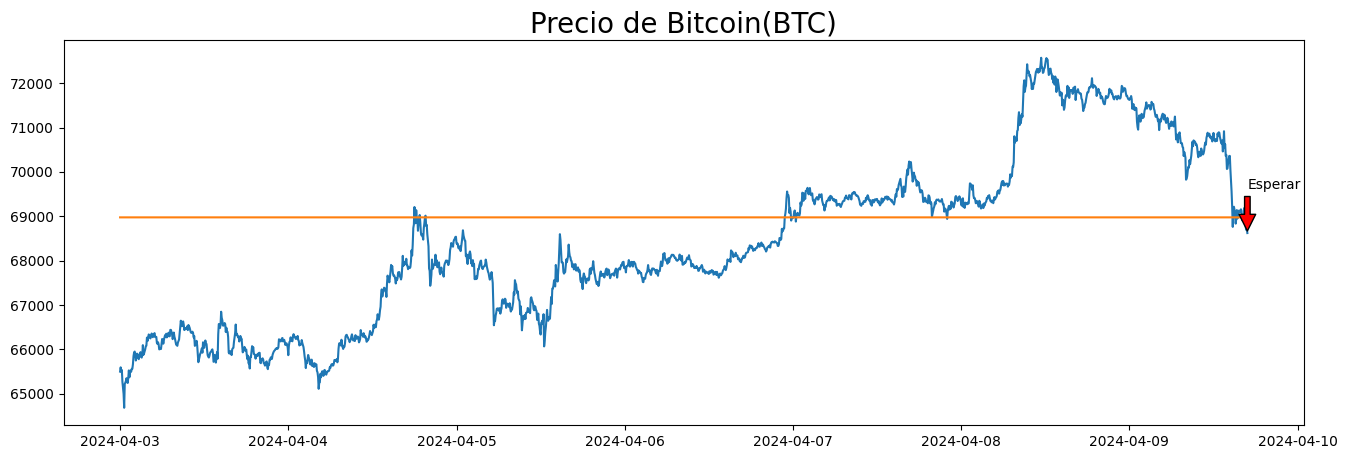

In [33]:
visualizacion()

# **6. Automatización**

El trabajo de un Data Scientist sólo termina cuando la solución al problema está automatizada, esto permite soluciones automáticas para nuevos lotes de información.

Se Importan el método 'clear_output()',y también la biblioteca ‘time’

Se onstruyó un loop infinito para ejecutar permanentemente y en intervalos de 5 minutos, las funciones que hemos construído en los pasos anteriores:

In [34]:
while(True):
    clear_output()
    importar_base_bitcoin()
    extraer_tendencias()
    limpieza_datos()
    tomar_decisiones()
    visualizacion()
    #time.sleep(300)

KeyboardInterrupt: 